In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [27]:
plt.rcParams['figure.figsize'] = [15, 10]

# Load an image (you can freely choose any image you like)
img = cv2.imread('./test_image.jpg')

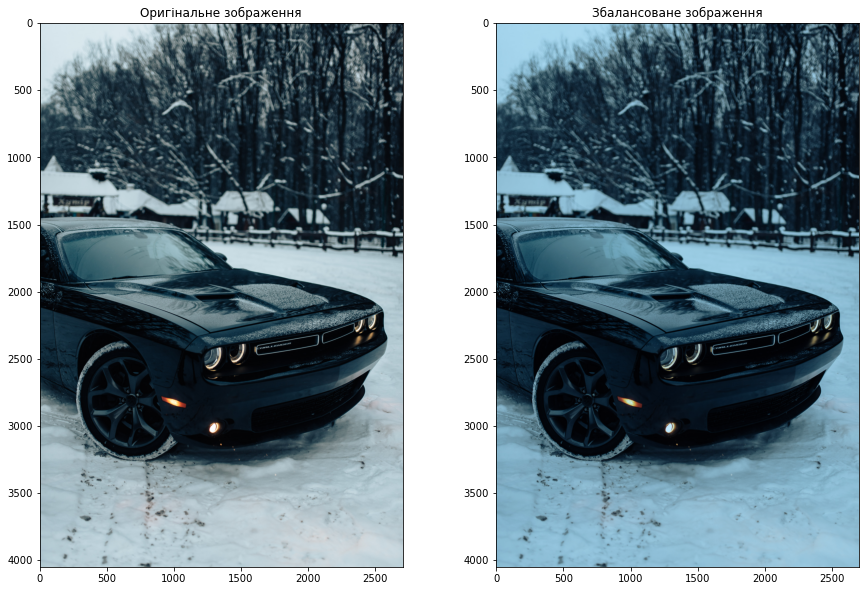

In [30]:

mean_r = np.mean(img[:, :, 0])
mean_g = np.mean(img[:, :, 1])
mean_b = np.mean(img[:, :, 2])

# Обчислюємо коефіцієнти kr, kg, kb
# Припустимо, що коефіцієнт найяскравшого каналу (наприклад, зелений) дорівнює 1
# Тоді решта коефіцієнтів визначимо відносно цього
kr = 1.0
kg = mean_g / mean_r
kb = mean_b / mean_r

# Застосовуємо баланс кольорів та генеруємо збалансоване зображення
balanced = np.zeros_like(img, dtype=np.float32)
balanced[:, :, 0] = kr * img[:, :, 0]
balanced[:, :, 1] = kg * img[:, :, 1]
balanced[:, :, 2] = kb * img[:, :, 2]

# Перетворюємо збалансоване зображення назад у цілочисельний формат
balanced = np.clip(balanced, 0, 255).astype(np.uint8)

plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Оригінальне зображення')
plt.subplot(122), plt.imshow(cv2.cvtColor(balanced, cv2.COLOR_BGR2RGB)), plt.title('Збалансоване зображення')
plt.show()



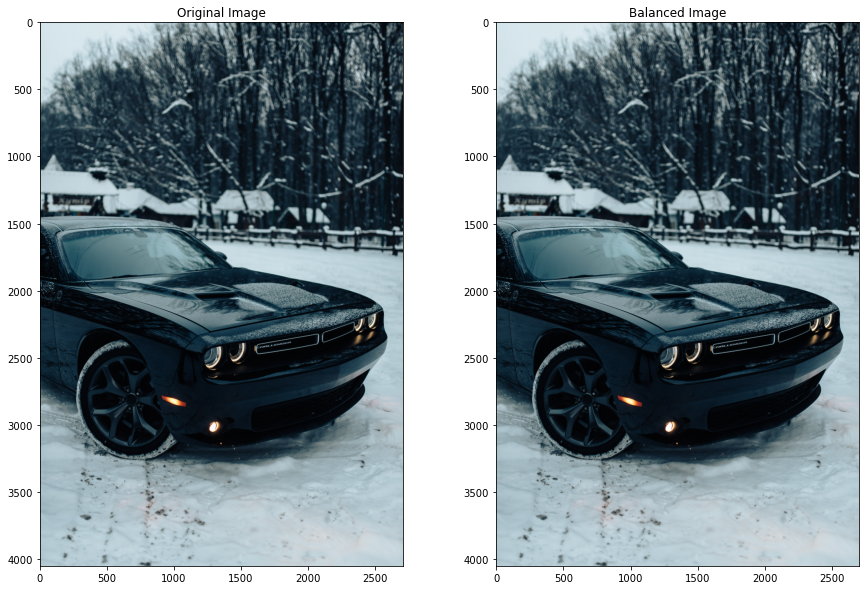

In [33]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

max_r = np.max(img[:, :, 0])
max_g = np.max(img[:, :, 1])
max_b = np.max(img[:, :, 2])

# Apply scale-by-max balancing
balanced = img.astype(float) / np.array([max_r, max_g, max_b])

balanced = np.clip(balanced, 0, 1)

plt.subplot(121), plt.imshow(img)
plt.title('Original Image')

plt.subplot(122), plt.imshow(balanced)
plt.title('Balanced Image')

plt.show()